In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [47]:
insurance_data=pd.read_csv('/content/insurance.csv')

In [48]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
insurance_data.shape

(1338, 7)

In [50]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we have 3 categorical columns

---.sex
---.smoker
---.region

Data Analysis

In [52]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 500x500 with 0 Axes>

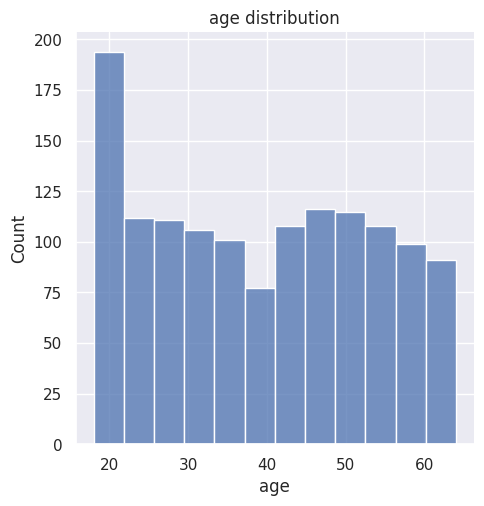

In [53]:
#distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.displot(insurance_data['age'])
plt.title('age distribution')
plt.show()

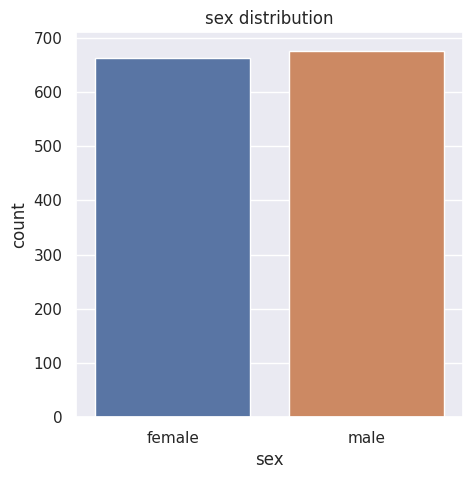

In [54]:
#distribution of gender
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance_data)
plt.title('sex distribution')
plt.show()

In [55]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-56-b4dc179f2b81>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


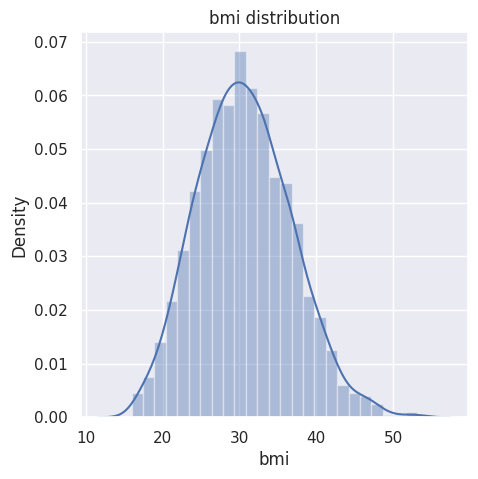

In [56]:
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['bmi'])
plt.title('bmi distribution')
plt.show()

normal bmi range --->18.5 to 24.9

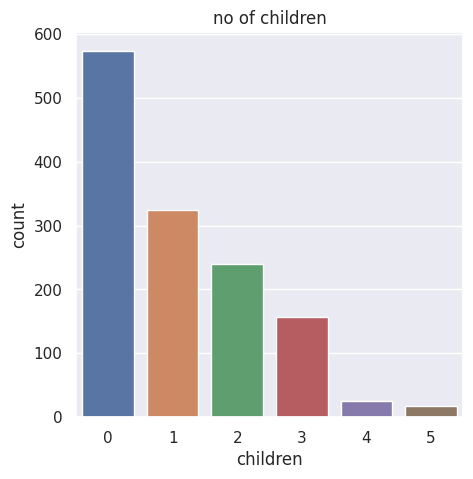

In [57]:
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=insurance_data)
plt.title('no of children')
plt.show()

In [58]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

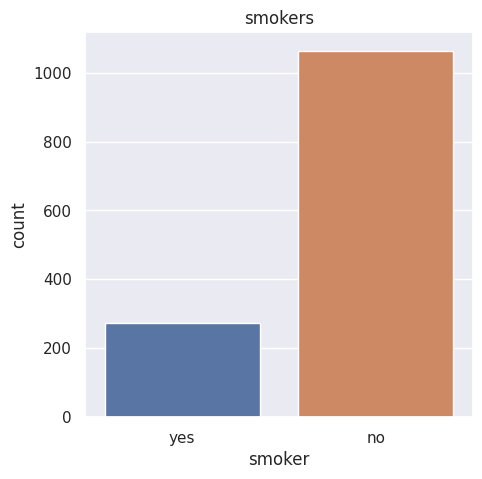

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=insurance_data)
plt.title('smokers')
plt.show()

In [60]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

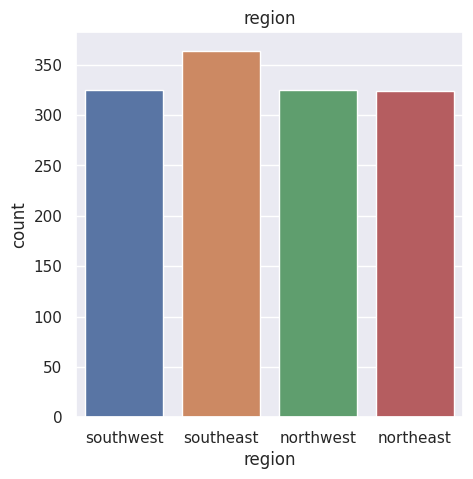

In [61]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance_data)
plt.title('region')
plt.show()

In [62]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-63-0addc49aba06>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


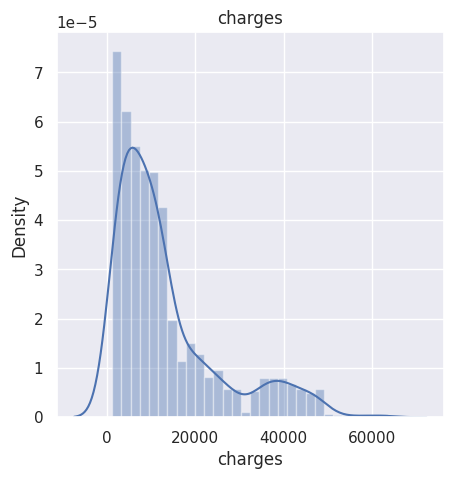

In [63]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['charges'])
plt.title('charges')
plt.show()

data preprocessing

In [64]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
insurance_data.replace({'sex':{'female':0,'male':1}},inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

sex

*   0-->female
*   1-->male



smoker

*   0--->yes
*   1--->no



region

*   southeast---->0
*   southwest---->1
*   northeast---->2
*   northwest--->3



In [83]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


splitting the feature and target

In [84]:
x=insurance_data.drop(['charges'],axis=1)
y=insurance_data['charges']

In [85]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       0       1
1      18    1  33.770         1       1       0
2      28    1  33.000         3       1       0
3      33    1  22.705         0       1       3
4      32    1  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       1       3
1334   18    0  31.920         0       1       2
1335   18    0  36.850         0       1       0
1336   21    0  25.800         0       1       1
1337   61    0  29.070         0       0       3

[1338 rows x 6 columns]


In [86]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


splitting into traning and testing

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [88]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


model training

In [89]:
model=LinearRegression()

In [90]:
model.fit(x_train,y_train)

LinearRegression()

evaluation

In [91]:
#on training data
x_train_predict=model.predict(x_train)
print(x_train_predict)

[  478.49404197  9317.75369733 13193.79859142 ... 17327.55442479
  9600.51860822 13753.18970971]


In [92]:
#R square error
error_score=metrics.r2_score(y_train,x_train_predict)
print(error_score)

0.751505643411174


In [93]:
#on testing data
x_test_predict=model.predict(x_test)
print(x_test_predict)

[ 1520.59242161 11570.5920178  10082.43849883  2246.21754312
  7881.28362035 11081.50227956  3538.24791808   698.03224036
 12223.4851558   9611.93217623 11657.51046259  4891.0539656
 29947.50192274  -370.8384887  12401.36048618 13243.21522903
  3814.42216541  7883.39384825 29431.34485576  2362.83672121
 12505.50452609  2256.75277238 34468.01948464 31742.4859866
 30306.19118561  9027.76110059  1923.87420399 15247.09503907
  6542.61302531  2104.79910554  9484.36642532  5794.91649267
  4425.26853454  5015.3811241   9579.4545934   4601.74838962
 29875.58083252  6797.04084444 27239.25811383 13999.0938259
   313.55184653 28415.75044713  7886.54751277  1478.09056648
 10273.28966107  8003.09003405 11612.15283896  8175.95966058
 10753.45200738 13802.18082647  5740.90172027  -737.13333209
 26346.21771217 37192.66032995  7364.09646118 17845.51752284
  1412.63748094 11042.48090545  2159.33597148 34066.1609094
 11646.83178834   874.98548929  4020.66706965 35913.0386546
 -1034.71506651 13963.4947048

In [94]:
error_score2=metrics.r2_score(y_test,x_test_predict)
print(error_score2)

0.7447273869684076


In [97]:
#making a predictive system
input_data=(31,1,25.74,0,0,1)
input_data_as_np_array=np.asarray(input_data)
reshaped_data=input_data_as_np_array.reshape(1,-1)
predicted_data=model.predict(reshaped_data)
print(predicted_data)

[27874.28755473]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
